# Modelado Estocástico
## Clase 2 - Ejercitación 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
def media_mixtura(peso1, mu1, peso2, mu2):
    return peso1 * mu1 + peso2 * mu2

def varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2):
    mu_mixtura = media_mixtura(peso1, mu1, peso2, mu2)
    return peso1 * (varianza1 + (mu1 - mu_mixtura) ** 2) + peso2 * (varianza2 + (mu2 - mu_mixtura) ** 2)

def desvio_std_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2):
    return np.sqrt(varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2))

def tercer_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2):
    mu_mixtura = media_mixtura(peso1, mu1, peso2, mu2)
    return (peso1 * ((mu1 - mu_mixtura) ** 3 + 3 * (mu1 - mu_mixtura) * varianza1)+ peso2 * ((mu2 - mu_mixtura) ** 3 + 3 * (mu2 - mu_mixtura) * varianza2))

def cuarto_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2):
    mu_mixtura = media_mixtura(peso1, mu1, peso2, mu2)
    return (peso1 * ((mu1 - mu_mixtura) ** 4 + 6 * (mu1 - mu_mixtura) ** 2 * varianza1 + 3 * varianza1 ** 2)
    + peso2 * ((mu2 - mu_mixtura) ** 4 + 6 * (mu2 - mu_mixtura) ** 2 * varianza2 + 3 * varianza2 ** 2))

def skewness(peso1, varianza1, mu1, peso2, varianza2, mu2):
    return tercer_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2)/(desvio_std_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2) ** 3)

def kurtosis_total(peso1, varianza1, mu1, peso2, varianza2, mu2):
    return cuarto_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2)/ (varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2) ** 2)

def estadisticos(peso1, varianza1, mu1, peso2, varianza2, mu2):
    print("Media:", media_mixtura(peso1, mu1, peso2, mu2))
    print("Varianza:", round(varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2),5))
    print("Tercer momento μ₃:", round(tercer_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2),5))
    print("Cuarto momento μ₄:",   round(cuarto_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2),5))
    print("Asimetría:", round(skewness(peso1, varianza1, mu1, peso2, varianza2, mu2),5))
    print("Kurtosis:", round(kurtosis_total(peso1, varianza1, mu1, peso2, varianza2, mu2),5))


### Ejercicio 1 - Mixtura
   
$f(x) = 0.4 \cdot\frac{1}{\sqrt{18\pi}}e^{-\frac{(x+1)^2}{18}} + 0.6 \cdot\frac{1}{\sqrt{8\pi}}e^{-\frac{(x+1)^2}{8}}$

In [ ]:
w1 = 0.4
mu1 = -1
var1 = 9

w2 = 0.6
mu2 = -1
var2 = 4

col_1 = np.arange(-10, 10.05, 0.1)
df = pd.DataFrame({'z': col_1})

df['pdf_m1_v9'] = stats.norm.pdf(df['z'], loc=-1, scale=3)
df['pdf_m1_v4'] = stats.norm.pdf(df['z'], loc=-1, scale=2)
df['pdf_mxtr'] = w1 * df['pdf_m1_v9'] + w2 * df['pdf_m1_v4']
df.head(10)

,z,pdf_m1_v9,pdf_m1_v4,pdf_mxtr
0,-10.0,0.001477,0.000008,0.000596
1,-9.9,0.001632,0.000010,0.000659
2,-9.8,0.001800,0.000012,0.000728
3,-9.7,0.001984,0.000016,0.000803
4,-9.6,0.002184,0.000019,0.000885
5,-9.5,0.002402,0.000024,0.000975
6,-9.4,0.002638,0.000029,0.001073
7,-9.3,0.002895,0.000036,0.001180
8,-9.2,0.003173,0.000045,0.001296
9,-9.1,0.003474,0.000055,0.001422


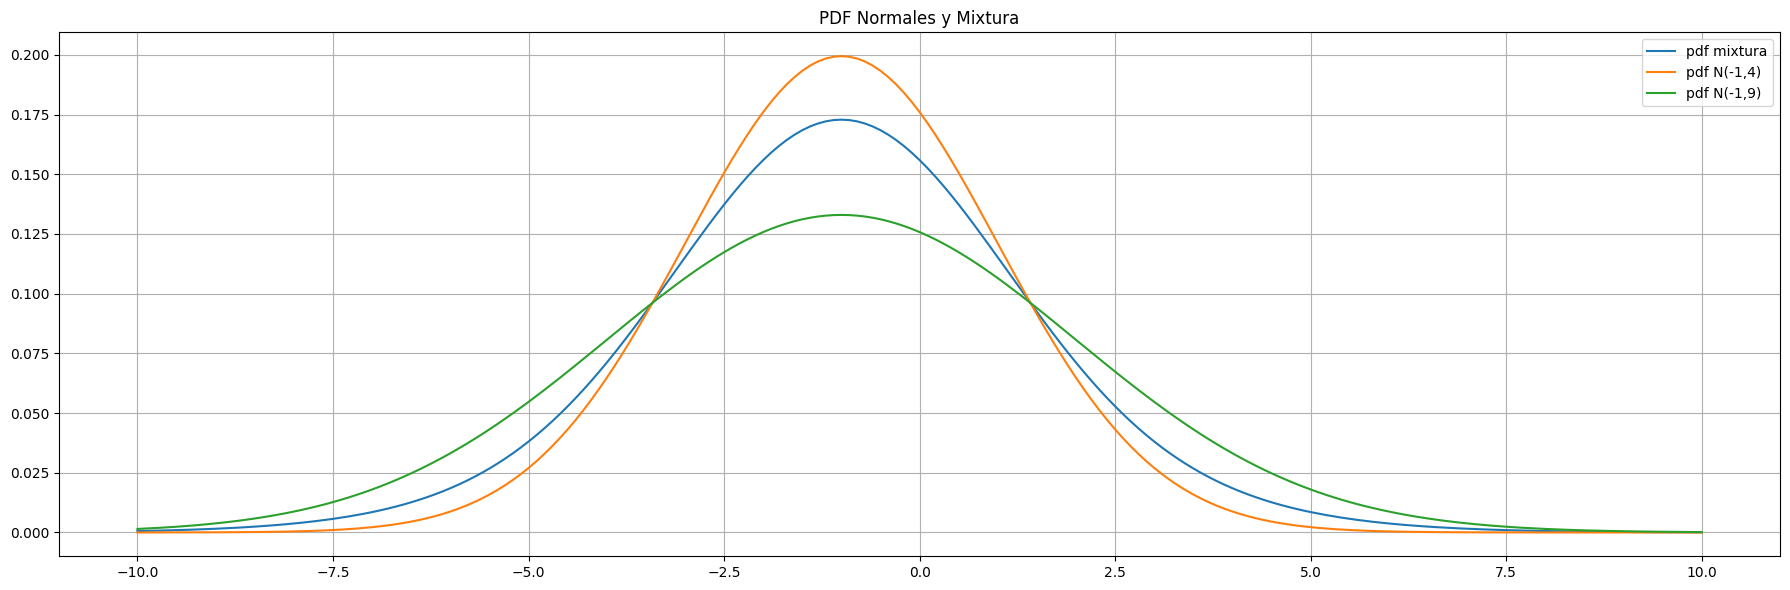

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df['z'],df['pdf_mxtr'],label='pdf mixtura')
plt.plot(df['z'],df['pdf_m1_v4'],label='pdf N(-1,4)')
plt.plot(df['z'],df['pdf_m1_v9'],label='pdf N(-1,9)')
plt.title("PDF Normales y Mixtura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
estadisticos(w1,var1,mu1,w2,var2,mu2)

Media: -1.0
Varianza: 6.0
Tercer momento μ₃: 0.0
Cuarto momento μ₄: 126.0
Asimetría: 0.0
Kurtosis: 3.5


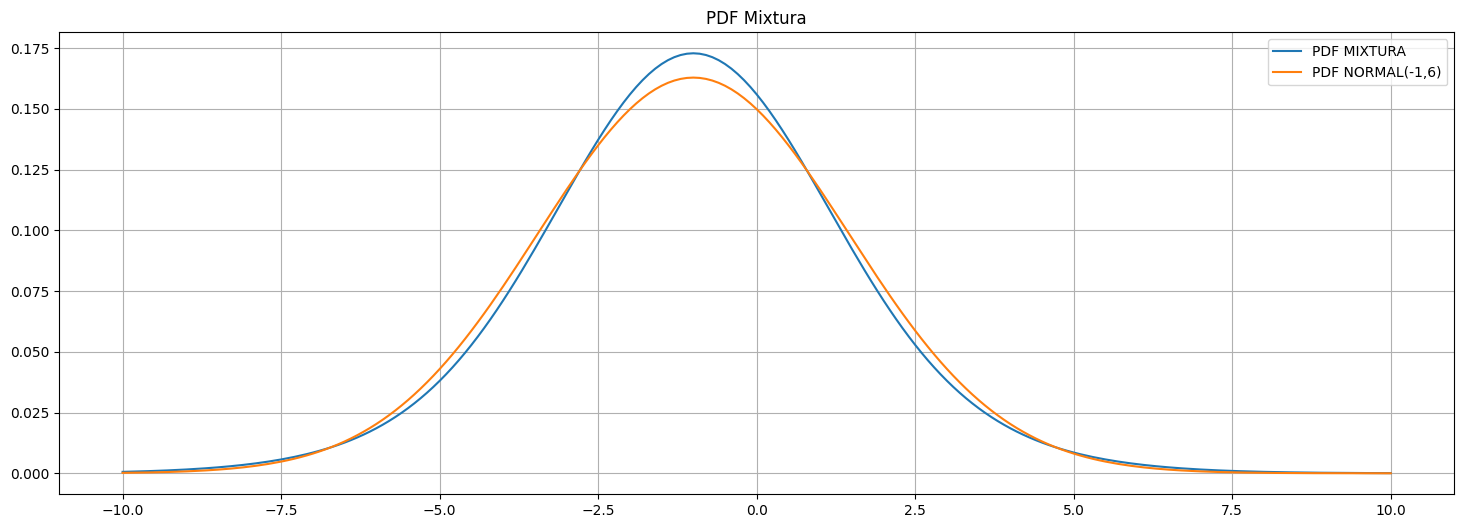

In [ ]:
mu_mix= media_mixtura(w1,mu1,w2,mu2)
std_mix = desvio_std_mixtura(w1,var1,mu1,w2,var2,mu2)
df['pdf_normal'] = stats.norm.pdf(df['z'], loc=mu_mix, scale=std_mix)
plt.figure(figsize=(18, 6))
plt.plot(df['z'],df['pdf_mxtr'], label = 'PDF MIXTURA')
plt.plot(df['z'],df['pdf_normal'], label = 'PDF NORMAL(-1,6)')
plt.title("PDF Mixtura")
plt.legend()
plt.grid(True)


#### BOOTSTRAP  n = 2000

Se generan valores aleatorios de ambas normales y luego se seleccionan aleatoriamente en función de sus pesos en la mixtura, generando el bootstrap.

In [ ]:
n = 2000
n19 = np.random.normal(mu1,np.sqrt(var1),size=n)
n14 = np.random.normal(mu2,np.sqrt(var2),size=n)
u01 = np.random.uniform(size=n)
bootstrap_mxt = np.where(u01 < w1, n19,n14)

promedio = bootstrap_mxt.mean()
desvio_std = bootstrap_mxt.std()
ke = stats.kurtosis(bootstrap_mxt)
asimetria = stats.skew(bootstrap_mxt)

boostrap_estandar = np.sort((bootstrap_mxt - promedio) / desvio_std)

print(f'Promedio: {promedio}')
print(f'Desvío std: {desvio_std}')
print(f'Asimetría: {asimetria}')
print(f'curtosis en exceso: {ke}')

df_bootstrap = pd.DataFrame({'N(-1,9)': n19, 'N(-1,4)':n14, 'U[0,1]':u01, 'Bootstrap de Mixtura':bootstrap_mxt})
df_bootstrap.head(8)

Promedio: -0.9278933070600679
Desvío std: 2.4600507215994636
Asimetría: 0.12661903751005132
curtosis en exceso: 0.7331909835364501


,"N(-1,9)","N(-1,4)","U[0,1]",Bootstrap de Mixtura
0,2.133629,0.454674,0.910501,0.454674
1,-3.455967,-0.054224,0.615128,-0.054224
2,-0.559191,-4.154732,0.651544,-4.154732
3,6.694016,-2.378154,0.386095,6.694016
4,6.897084,3.054731,0.057286,6.897084
5,-3.034769,-0.275947,0.729238,-0.275947
6,3.624091,-1.247723,0.911888,-1.247723
7,-4.588384,1.887894,0.083233,-4.588384


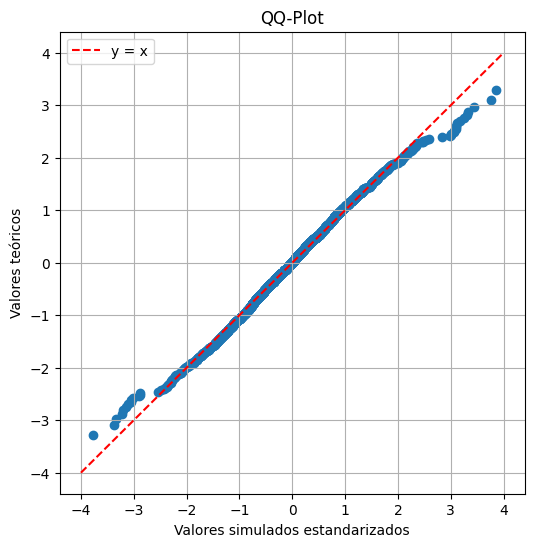

In [ ]:
cuantiles_teoricos = stats.norm.ppf(np.arange(1,n+1)/n)
plt.figure(figsize=(6,6))
plt.scatter(boostrap_estandar, cuantiles_teoricos)
plt.plot([-4, 4], [-4, 4], 'r--', label="y = x")
plt.xlabel("Valores simulados estandarizados")
plt.ylabel("Valores teóricos")
plt.title("QQ-Plot")
plt.grid(True)
plt.legend()
plt.show()

### Ejercicio 2 - Mixtura

In [ ]:
p1 = 0.35
m1 = 1.2
vr1 = 0.09

p2 = 0.65
m2 = -0.8
vr2 = 0.81

df['pdf_n1'] = stats.norm.pdf(df['z'], loc=m1, scale=np.sqrt(vr1))
df['pdf_n2'] = stats.norm.pdf(df['z'], loc=m2, scale=np.sqrt(vr2))
df['pdf_mxtr2'] = p1 * df['pdf_n1'] + p2 * df['pdf_n2']
df[['z','pdf_n1','pdf_n2','pdf_mxtr2']].head()

,z,pdf_n1,pdf_n2,pdf_mxtr2
0,-10.0,2.942997e-303,9.039019e-24,5.875362e-24
1,-9.9,7.066689e-298,2.797134e-23,1.818137e-23
2,-9.8,1.518403e-292,8.549554e-23,5.557210e-23
3,-9.7,2.919465e-287,2.581143e-22,1.677743e-22
4,-9.6,5.023016e-282,7.696956e-22,5.003021e-22


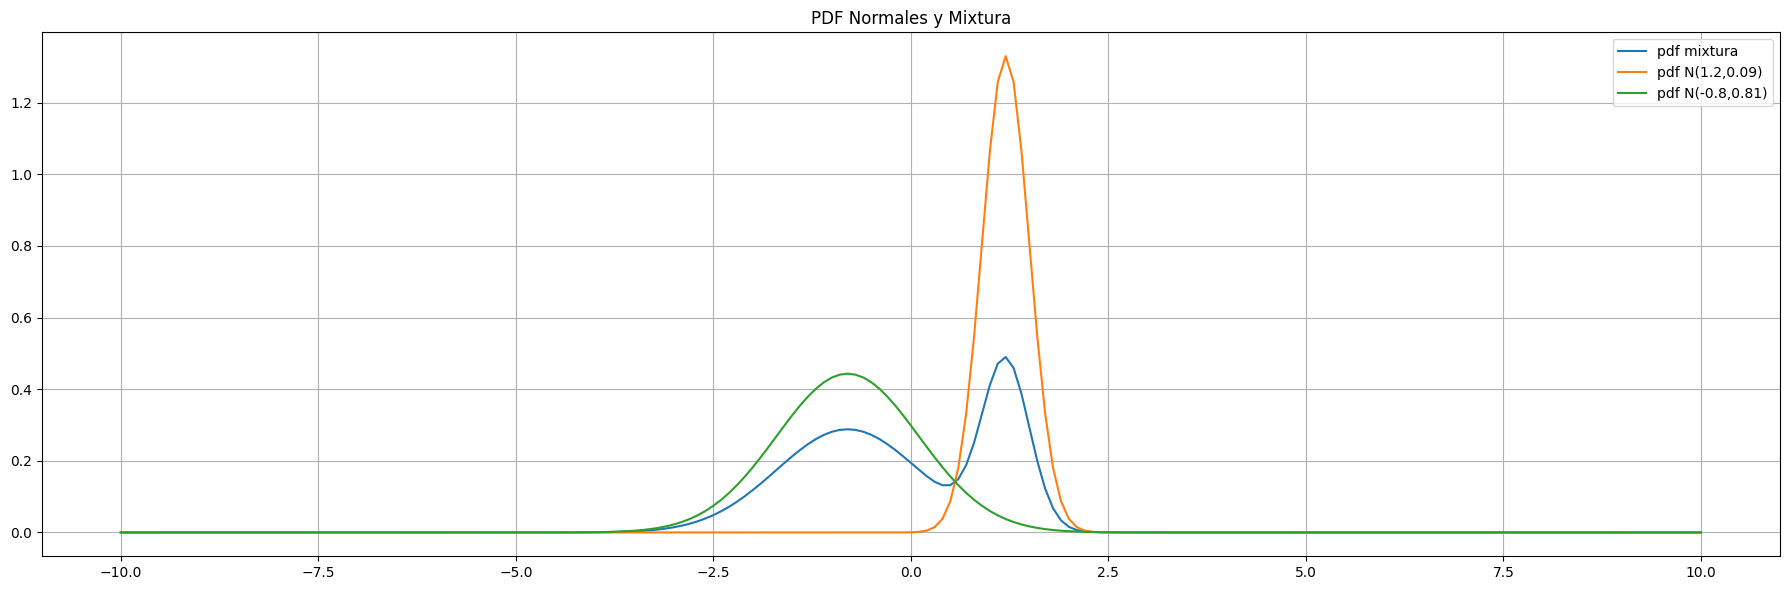

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df['z'],df['pdf_mxtr2'],label='pdf mixtura')
plt.plot(df['z'],df['pdf_n1'],label='pdf N(1.2,0.09)')
plt.plot(df['z'],df['pdf_n2'],label='pdf N(-0.8,0.81)')
plt.title("PDF Normales y Mixtura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
estadisticos(p1,vr1,m1,p2,vr2,m2)


Media: -0.10000000000000003
Varianza: 1.468
Tercer momento μ₃: -0.4368
Cuarto momento μ₄: 4.31092
Asimetría: -0.24558
Kurtosis: 2.0004


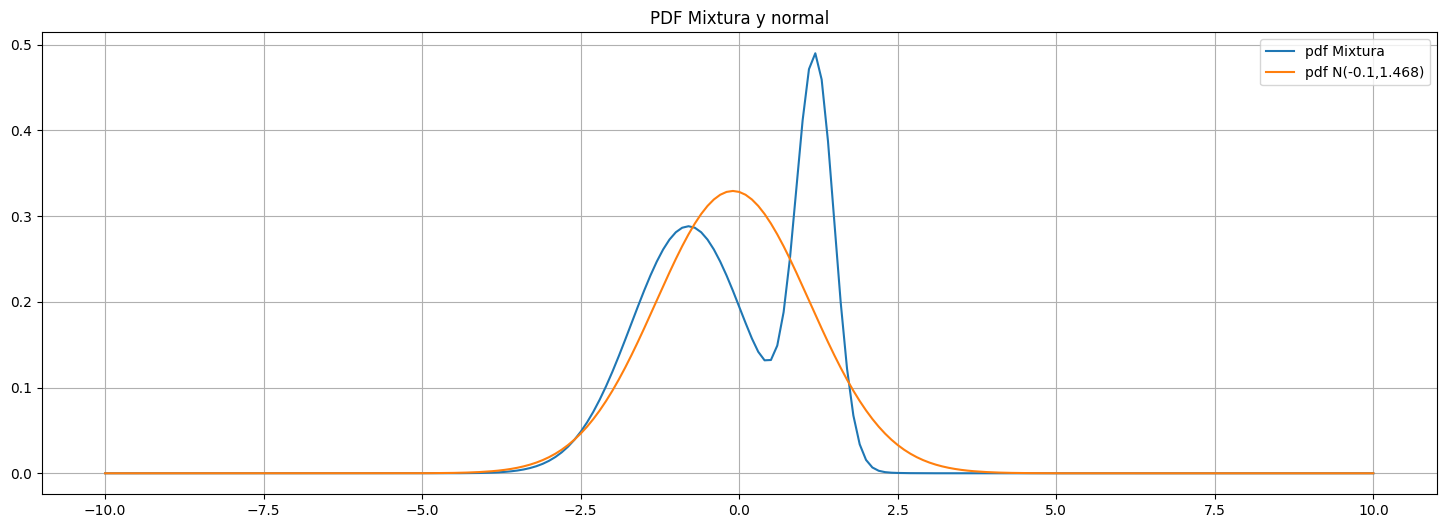

In [ ]:
mu_mix2 = media_mixtura(p1,m1,p2,m2)
std_mix2 = desvio_std_mixtura(p1,vr1,m1,p2,vr2,m2)
df['pdf_normal2'] = stats.norm.pdf(df['z'], loc=mu_mix2, scale=std_mix2)
plt.figure(figsize=(18, 6))
plt.plot(df['z'],df['pdf_mxtr2'],label='pdf Mixtura')
plt.plot(df['z'],df['pdf_normal2'], label='pdf N(-0.1,1.468)')
plt.title("PDF Mixtura y normal")
plt.legend()
plt.grid(True)


In [ ]:
n = 2000
n1 = np.random.normal(m1,np.sqrt(vr1),size=n)
n2 = np.random.normal(m2,np.sqrt(vr2),size=n)
u01 = np.random.uniform(size=n)
bootstrap_mxt2 = np.where(u01 < p1, n1,n2)

promedio2 = bootstrap_mxt2.mean()
desvio_std2 = bootstrap_mxt2.std()
ke2 = stats.kurtosis(bootstrap_mxt2)
asimetria2 = stats.skew(bootstrap_mxt2)

boostrap_estandar2 = np.sort((bootstrap_mxt2 - promedio2) / desvio_std2)

print(f'Promedio: {promedio2}')
print(f'Desvío std: {desvio_std2}')
print(f'Asimetría: {asimetria2}')
print(f'curtosis en exceso: {ke2}')

Promedio: -0.09241709668390366
Desvío std: 1.1887618126929458
Asimetría: -0.18402751708125858
curtosis en exceso: -1.0229967652220053


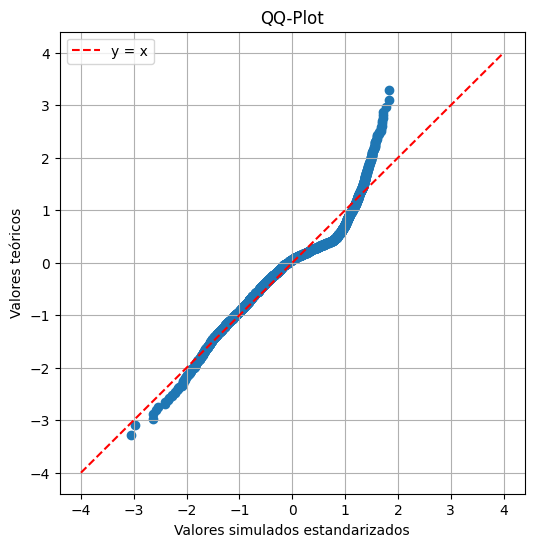

In [ ]:
cuantiles_teoricos = stats.norm.ppf(np.arange(1,n+1)/n)
plt.figure(figsize=(6,6))
plt.scatter(boostrap_estandar2, cuantiles_teoricos)
plt.plot([-4, 4], [-4, 4], 'r--', label="y = x")
plt.xlabel("Valores simulados estandarizados")
plt.ylabel("Valores teóricos")
plt.title("QQ-Plot")
plt.grid(True)
plt.legend()
plt.show()